# ДЗ Урок 3

In [1]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

## Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [2]:
zp = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]
data = {'zp':[100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]}
df = pd.DataFrame(data)

In [3]:
summ = 0
for i in zp:
    summ = summ + i
middle_summ = summ / len(zp)
print(f'Среднее арифметическое {middle_summ}')
middle_summ_b = df['zp'].mean()
print(f'Среднее арифметическое библиотека {middle_summ_b}')

Среднее арифметическое 73.14285714285714
Среднее арифметическое библиотека 73.14285714285714


In [4]:
sample_variance_displaced = 0
for i in zp:
    sample_variance_displaced = sample_variance_displaced + (i - middle_summ) ** 2 / len(zp)
print(f'Смещенная оценка дисперсии {sample_variance_displaced}')
sample_variance_displaced_b = ((df['zp'] - df['zp'].mean()) ** 2).sum() / df['zp'].shape[0]
print(f'Смещенная оценка дисперсии библиотека {sample_variance_displaced_b}')

Смещенная оценка дисперсии 2135.074829931973
Смещенная оценка дисперсии библиотека 2135.0748299319725


In [5]:
sample_variance_unbiased = 0
for i in zp:
    sample_variance_unbiased = sample_variance_unbiased + (i - middle_summ) ** 2 / (len(zp) - 1)
print(f'Несмещенная оценка дисперсии {sample_variance_unbiased}')
sample_variance_unbiased_b = df['zp'].var()
print(f'Несмещенная оценка дисперсии библиотека {sample_variance_unbiased_b}')

Несмещенная оценка дисперсии 2241.8285714285716
Несмещенная оценка дисперсии библиотека 2241.8285714285716


In [6]:
print(f'Среднее квадратичное отклонение смещенное {sample_variance_displaced ** 0.5}')
skos = df['zp'].std(ddof=0)
print(f'Среднее квадратичное отклонение смещенное библиотека {skos}')

Среднее квадратичное отклонение смещенное 46.20686994302874
Среднее квадратичное отклонение смещенное библиотека 46.20686994302874


In [7]:
print(f'Среднее квадратичное отклонение несмещенное {sample_variance_unbiased ** 0.5}')
skon = df['zp'].std(ddof=1)
print(f'Среднее квадратичное отклонение несмещенное библиотека {skon}')

Среднее квадратичное отклонение несмещенное 47.34795213553139
Среднее квадратичное отклонение несмещенное библиотека 47.34795213553139


## Задача 2

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выбросы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [8]:
zp.sort()
zp

[17,
 24,
 25,
 30,
 33,
 45,
 55,
 57,
 65,
 65,
 70,
 75,
 75,
 77,
 80,
 84,
 89,
 90,
 100,
 150,
 230]

In [9]:
print(f'Медиана {zp[round(len(zp) / 2) + 1]}')

Медиана 75


In [10]:
len(zp) // 2 // 2

5

In [11]:
q1 = zp[len(zp) // 2 // 2]
print(f'Первый квартиль {q1}')

Первый квартиль 45


In [12]:
df['zp'].quantile(0.25)

45.0

In [13]:
q3 = zp[len(zp) * 3 // 2 // 2]
print(f'Третий квартиль {q3}')

Третий квартиль 84


In [14]:
df['zp'].quantile(0.75)

84.0

In [15]:
df['zp'].quantile([0.25, 0.5, 0.75])

0.25    45.0
0.50    70.0
0.75    84.0
Name: zp, dtype: float64

In [16]:
print(f'Интерквартильный размах {[q1, q3]}')

Интерквартильный размах [45, 84]


In [17]:
np.quantile(df['zp'], [0.25, 0.75])

array([45., 84.])

In [18]:
iqr = q3 - q1
print(f'Интерквартильное расстояние {iqr}')

Интерквартильное расстояние 39


In [19]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-13.5, 142.5)

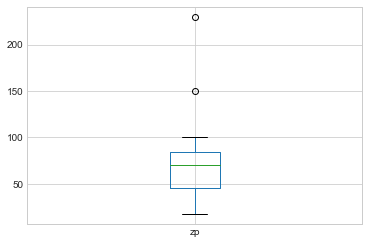

In [20]:
df[['zp']].boxplot()

In [21]:
import seaborn as sns

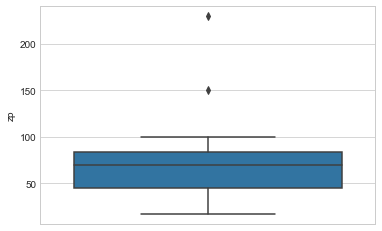

In [22]:
sns.boxplot(df['zp'], orient='v')

Не совпадение границ ящика и фактических границ вызвано тем, что граница задается по реальным данным. Поэтому верхняя граница прошла по 100, а нижняя по 17

In [23]:
outliers = 0
for i in zp:
    if i < boxplot_range[0] or i > boxplot_range[1]:
        outliers += 1
print(f'Выбросы {outliers}')

Выбросы 2


## Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

A = B

C = 2A = 2B

P(A) = 0.8

P(B) = 0.7

P(C) = 0.9

Вероятность того, что студент принадлежит факультету A или B = 0.25. Факультету C = 0.5

Значит безусловная вероятность сдать сессию студентом

In [24]:
0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9

0.825

Вероятность, что учится на факультете A

In [25]:
0.25 * 0.8 / 0.825

0.24242424242424246

Вероятность, что учится на факультете B

In [26]:
0.25 * 0.7 / 0.825

0.21212121212121213

Вероятность, что учится на факультете C

In [27]:
0.5 * 0.9 / 0.825

0.5454545454545455